                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



/Users/jonathandrori/miniconda2/envs/LIGO/lib/python3.7/site-packages/ipykernel_launcher.py:181: UserWarning: parseCommands depreciated, use parse.
/Users/jonathandrori/miniconda2/envs/LIGO/lib/python3.7/site-packages/ipykernel_launcher.py:181: UserWarning: parseCommands depreciated, use parse.


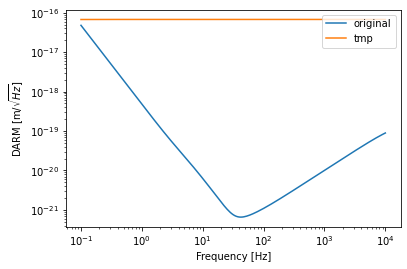

In [1]:
from pykat import finesse, components                  # Importing the pykat.finesse package
import matplotlib.pyplot as plt
import random
import time

basecode_orig  = """
## Parameters ##
const Pin 200        # Input laser power (200 W)
const LX 4000        # Length of X arm (4000 m)
const LY 4000        # Length of Y arm (4000 m)
const Asy 0.0036     # Schnupp asymmetry
const nsilica 1.44963098985906

## Laser & Beam splitter ##
l laser $Pin 0 n0                         # Laser
s s1 1 n0 nbsc                            # Space from laser to beam splitter

###########################################################################
# BS beamsplitter
##------------------------------------------------------------ 
## BS 
##                             ^ 
##                  to ITMY    |      
##                             |      ,'-.
##                             |     +    `. 
##                        nbsY |   ,'       :'
##      n0                     |  +i1      +
##         ---------------->    ,:._  i2 ,'
##    from the laser       nbsc + \  `-. + nbsX
##                           ,' i3\   ,' --------------->
##                          +      \ +     to ITMX
##                        ,'     i4.'
##                       `._      ..
##                          `._ ,' |nbsd
##                             -   |
##                                 |to the PD
##                                 |
##                                 v
##------------------------------------------------------------

bs1 BS 0.5 0 0 45 nbsc nbsY nBSi1 nBSi3
s BSsub1 0.0687 $nsilica nBSi1 nBSi2
s BSsub2 0.0687 $nsilica nBSi3 nBSi4
bs2 BSAR1 0 0 0 -29.195 nBSi2 dump14 nbsX dump16
bs2 BSAR2 0 0 0 29.195 nBSi4 dump15 nbsd dump17

## X arm ##
s lx 4.993 nbsX nITMx1              #Space from BS to ITMX
m1 ITMX 0.014 0 0 nITMx1 nITMx2 # Mirror ITMX (T = 0.014, L = 0,  phi = 0 deg)
s LX $LX nITMx2 nETMx1          # Space, ITMX to ETMX (4000 m)
m1 ETMX 5u 0 0 nETMx1 nETMx2    # Mirror ETMX (T = 5ppm, L = 0,  phi = 0 deg)

## Y arm ##
s ly 5.0126 nbsY nITMy1              # Space from BS to ITMY
m1 ITMY 0.014 0 0 nITMy1 nITMy2 # Mirror ITMY (T = 0.014, L = 0,  phi = 0 deg)      
s LY $LY nITMy2 nETMy1          # Space, ITMY to ETMY (4000 m)
m1 ETMY 5u 0 $Asy nETMy1 nETMy2 # Mirror ETMY (T = 5ppm, L = 0,  phi = $Asy)

## Output port ##
s sout 1 nbsd nout         # Space, BS to output

## Detectors ##
pd1 poutf $fs nout # Photodiode demodulated at the excitation frequency
pd0 poutdc nETMy1
qnoised noutf 1 $fs nout # Quantum noise photo detector

## Simulation instructions ##
# Excite the end mirrors differentially to calculate response of IFO to GW. 
fsig ETMXfsig ETMX 1 0
#fsig ETMYfsig ETMY 1 180

# Varying the fsig frequency
xaxis ETMXfsig f log 0.1 1e4 200   # Sweeps frequnecy of ETMX excitation from 10 to 10^3 in 200 logarithmic steps 
                                 # This also sets the frequency of the ETMY excitation since there can be only one fsig frequency per simulation

# Set the mass of the test masses to 40kg to include radiation pressure effects.
attr ETMY mass 40
attr ITMY mass 40
attr ETMX mass 40
attr ITMX mass 40
yaxis abs                        # Returns magnitude of detector outputs
"""









basecode  = """
const param0024 0.3333333333333333
const param0023 209.6461699863487
const param0022 0
const param0021 0
const param0020 0.0
const param0019 8.961761774822417
const param0018 0
const param0017 0
const param0016 0.0
const param0015 0.3333333333333333
const param0014 0.3333333333333333
const param0013 68.9984099716269
const param0012 197.23845827858102
const param0011 0
const param0010 0.0022026788601023305
const param009 0.0
const param0008 360
const param0007 200
const param0006 0.0
const param0005 359.9999999
const param0004 0.9929206603168622
const param0003 0.0070792403910717875
const param0002 0.0
const param0001 360
const param0000 0
l laser0 $param0000 $param0001 node0in
s s0 $param0002 node0in node0
m1 mirror1 $param0003 $param0004 $param0005 node0 node1in
s s1 $param0006 node1in node1
l laser2 $param0007 $param0008 node2in
s s2 $param009 node2in node2
bs1 BS3 $param0010 $param0011 $param0012 $param0013 node3in node4in node5in node2
s s3X0 $param0014 node5in node5
s s3X1 $param0015 node4in node4
s s3X2 $param0016 node3in node3
m1 mirror4 $param0017 $param0018 $param0019 node4 node6in
s s4 $param0020 node6in node6
m1 mirror5 $param0021 $param0022 $param0023 node3 node7in
s s5 $param0024 node7in node7
pd1 poutf $fs node5
qnoised noutf 1 $fs node5
fsig ETMXfsig mirror5 1 0
xaxis ETMXfsig f log 0.1 1e4 200
attr mirror5 mass 40
attr mirror1 mass 40
attr mirror4 mass 40
"""


basecode_tmp  = """
const param0023 0 #209.6461699863487
const param0019 1e-5 #0.000961761774822417
const param0013 68.9984099716269
const param0012 197.23845827858102
const param0010 0.0022026788601023305
const nsilica 1.44963098985906

l laser2 200 0 node2in
s s2 1 node2in node2
bs1 BS3 $param0010 0 $param0012 $param0013 node3in node4in node5in node2
#bs1 BS 0.5 0 0 45 node3in node4in nBSi1 nBSi3
#s BSsub1 0.0687 $nsilica nBSi1 nBSi2
#s BSsub2 0.0687 $nsilica nBSi3 nBSi4
#bs2 BSAR1 0 0 0 -29.195 nBSi2 dump14 node5in dump16
#bs2 BSAR2 0 0 0 29.195 nBSi4 dump15 node2 dump17

s s3X0 1 node5in node5
s s3X1 1 node4in node4
s s3X2 1 node3in node3
m1 mirror4 0 0 $param0019 node4 node6in
m1 mirror5 0 0 $param0023 node3 node7in
pd1 poutf $fs node4
pd0 poutdc node5
qnoised noutf 1 $fs node5
fsig ETMXfsig mirror5 1 0
#fsig ETMXfsig mirror4 1 180
xaxis ETMXfsig f log 0.1 1e4 200
attr mirror5 mass 40
attr mirror4 mass 40
"""

codes=[basecode_orig,basecode,basecode_tmp]
label=['original','modified', 'tmp']

LSens_arr=[]
for ii in [0, 2]:
    basekat = finesse.kat()    # Initialising Finesse
    basekat.verbose = False    # Tells Finesse to talk less    
    basekat.parseCommands(codes[ii])  # Parsing FINESSE code
    out = basekat.run()
    
    wl = 1e-6 # Laser wavelength
    freq = out.x # frequency [Hz]
    pout_deg = out["poutf"] # Demodulated power [W/deg]
    poutf_m = pout_deg*180/wl # Demodulated power  [W/m]
    qnoise = out["noutf"] # PD quantum noise. Shot noise in case of no squeezing [W/sqrt(Hz)]
    LSens = qnoise/poutf_m # Differential length change sensitivity [m/sqrt(Hz)]
    LSens_arr.append(LSens)
#    SSens = LSens/basekat.LX.L.value # Differential strain sensitivity [1/sqrt(Hz)]
    plt.loglog(freq, LSens, label=label[ii]) # Plot length sensitivity on a loglog scale
    plt.grid()
    plt.xlabel(r'Frequency [Hz]')
    plt.ylabel(r'DARM [m/$\sqrt{Hz}$]')
    plt.legend(loc="upper right")
    
plt.show()